# **Actividad de Interpolación**

Por: Juan Manuel Calvo Duque
Programación para Ingeniería - Maestría en Ingeniería Cohorte VIII

**Planteamiento del problema:**
La actividad se centra en el diseño de mecanismos que generen trayectorias rectilíneas, específicamente mecanismos de cuatro barras. A pesar de que la estructura de cuatro barras no permite una trayectoria recta perfecta debido a sus pares de giro, se busca una solución aproximada que sea suficientemente precisa. El objetivo es desarrollar un algoritmo que, mediante la interpolación, optimice el diseño de un mecanismo de Hoeken para lograr una combinación óptima de rectitud y velocidad constante, teniendo en cuenta los errores estructurales tanto en la rectitud como en la velocidad para un segmento rectilíneo específico y un rango angular determinado de la manivela.






In [ ]:
#Importar las librerias necesarias para el desarrollo de la actividad
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd

## Optimizar mediante Rectitud

### Mediante Lagrange

In [3]:
#Se agregan los vectores de ángulo y las relaciones de longitudes según la rectitud
angulo = [20, 40, 60, 80, 100, 120, 140, 160, 180]
L1_L2 = [2.975, 2.95, 2.9, 2.825, 2.725, 2.625, 2.5, 2.35, 2.2]
L3_L2 = [3.963, 3.925, 3.85, 3.738, 3.588, 3.438, 3.25, 3.025, 2.8]
Lx_L2 = [0.601, 1.193, 1.763, 2.299, 2.790, 3.238, 3.623, 3.933, 4.181]

In [4]:
#Cálculo de los polinomios para cada relación de longitud
p1, p2, p3 = [lagrange(angulo,L1_L2), lagrange(angulo,L3_L2), lagrange(angulo,Lx_L2)]

In [5]:
#Generación de spacio para calcular interpolaciones
X = np.linspace(20,180,100)

In [6]:
y1, y2, y3 = [p1(X), p2(X), p3(X)]

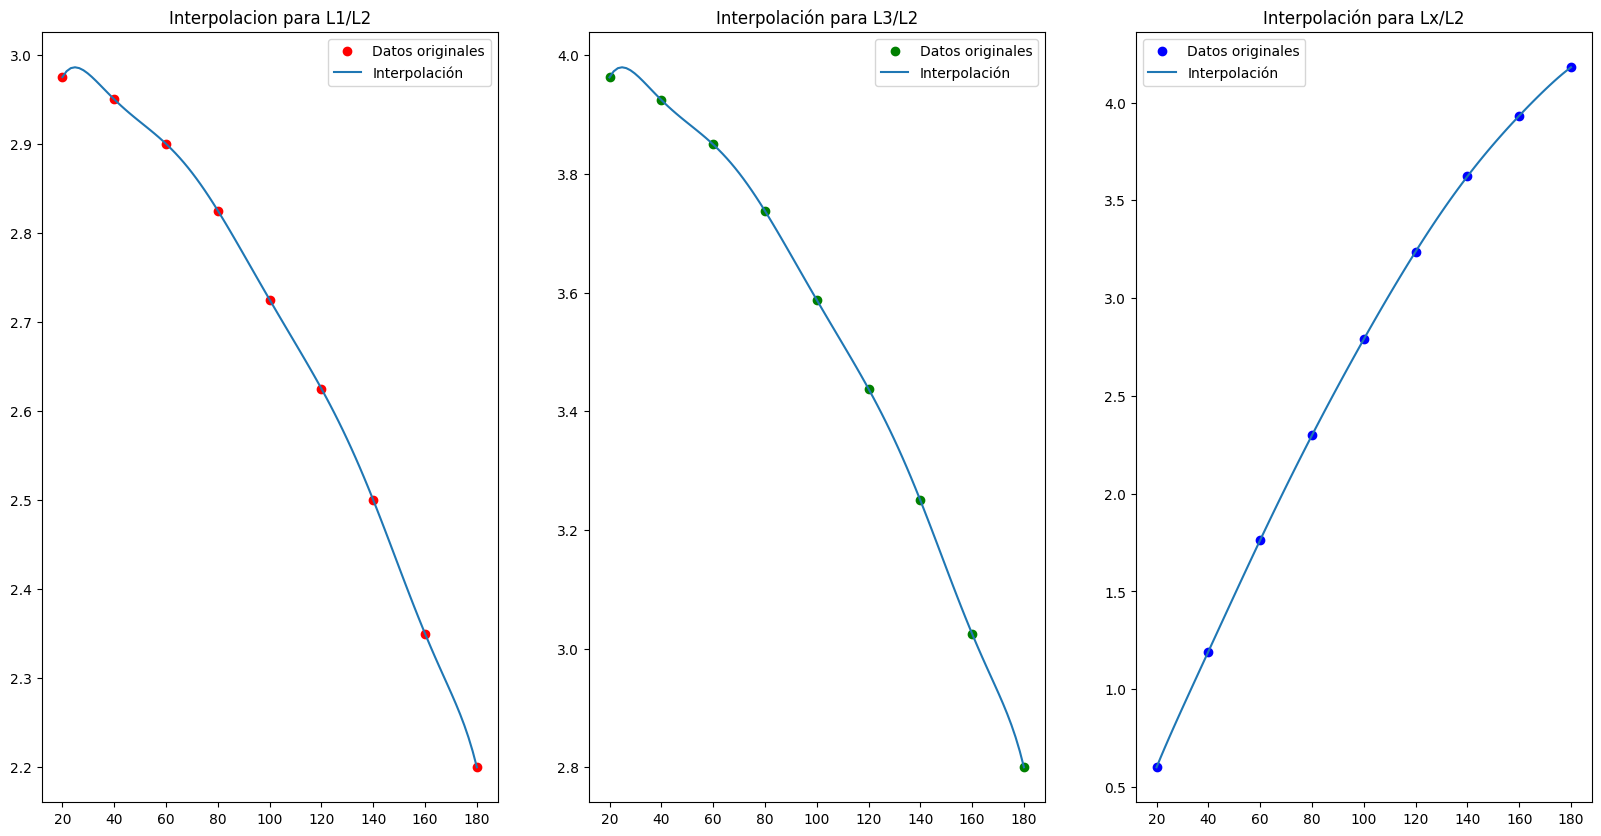

In [7]:
#Graficas de los datos originales y sus interpolaciones para cada relación de longitudes
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].plot(angulo, L1_L2, 'ro', label='Datos originales')
axs[0].plot(X, y1, '-', label='Interpolación')
axs[0].set_title('Interpolacion para L1/L2')
axs[0].legend()

axs[1].plot(angulo, L3_L2, 'go', label='Datos originales')
axs[1].plot(X, y2, '-', label='Interpolación')
axs[1].set_title('Interpolación para L3/L2')
axs[1].legend()

axs[2].plot(angulo, Lx_L2, 'bo', label='Datos originales')
axs[2].plot(X, y3, '-', label='Interpolación')
axs[2].set_title('Interpolación para Lx/L2')
axs[2].legend()


Calcular longitudes para 30 y 55, teniendo en cuenta que:

$$ L_2(x) = \frac{\Delta x}{p_3(x)} $$

$$ L_3(x) = L_2(x)*p_2(x) $$

$$ L_1(x) = L_2(x)*p_1(x)  $$
$$ L_4(x) = L_3(x) $$


In [8]:
#Definir la longitud del segmento
Lx = 20

In [9]:
#Calcular L1, L2, L3 y L4 para 30 grados
L2_30 = Lx/p3(30)
L3_30 = L2_30*p2(30)
L1_30 = L2_30*p1(30)
L4_30 = L3_30

In [10]:
#Calcular L1, L2, L3 y L4 para 55 grados
L2_55 = Lx/p3(55)
L3_55 = L2_55*p2(55)
L1_55 = L2_55*p1(55)
L4_55 = L3_55

### Mediante el método Interp de Numpy

In [12]:
# Realizar la interpolación mediante el método interp
y1_numpy = np.interp(X, angulo, L1_L2)
y2_numpy = np.interp(X, angulo, L3_L2)
y3_numpy = np.interp(X, angulo, Lx_L2)

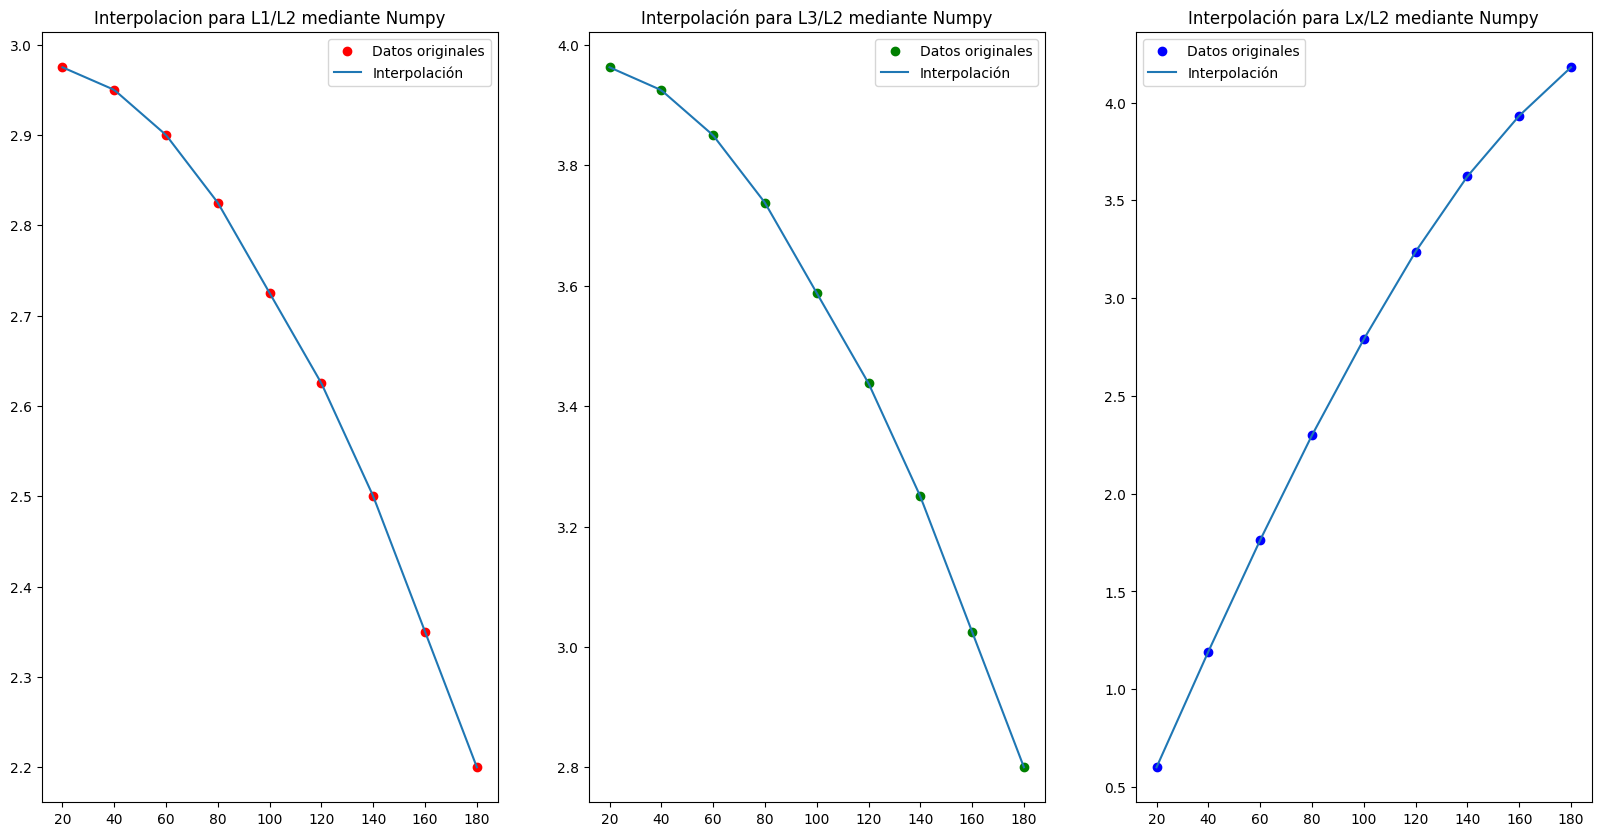

In [13]:
#Graficar las interpolaciones calculadas mediante Numpy y los datos originales
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].plot(angulo, L1_L2, 'ro', label='Datos originales')
axs[0].plot(X, y1_numpy, '-', label='Interpolación')
axs[0].set_title('Interpolacion para L1/L2 mediante Numpy')
axs[0].legend()

axs[1].plot(angulo, L3_L2, 'go', label='Datos originales')
axs[1].plot(X, y2_numpy, '-', label='Interpolación')
axs[1].set_title('Interpolación para L3/L2 mediante Numpy')
axs[1].legend()

axs[2].plot(angulo, Lx_L2, 'bo', label='Datos originales')
axs[2].plot(X, y3_numpy, '-', label='Interpolación')
axs[2].set_title('Interpolación para Lx/L2 mediante Numpy')
axs[2].legend()

In [14]:
#Calcular las longitudes L1, L2, L3 Y L4 para 30 grados
ang = 30
L2_30_numpy = Lx/np.interp(ang, angulo, Lx_L2)
L3_30_numpy = L2_30_numpy*np.interp(ang, angulo, L3_L2)
L1_30_numpy = L2_30_numpy*np.interp(ang, angulo, L1_L2)
L4_30_numpy = L3_30_numpy

In [15]:
#Calcular las longitudes L1, L2, L3 Y L4 para 55 grados
ang = 55
L2_55_numpy = Lx/np.interp(ang, angulo, Lx_L2)
L3_55_numpy = L2_55_numpy*np.interp(ang, angulo, L3_L2)
L1_55_numpy = L2_55_numpy*np.interp(ang, angulo, L1_L2)
L4_55_numpy = L3_55_numpy

A continuación, se visualizan las longitudes calculadas, con cada método, para compararlas

In [16]:
df = pd.DataFrame({
    'Ángulo (grados)':['30', '55'],
    'L1 (Lagrange)':[L1_30, L1_55],
    'L1 (Numpy)':[L1_30_numpy, L1_55_numpy],
    'L2 (Lagrange)':[L2_30, L2_55],
    'L2 (Numpy)':[L2_30_numpy, L2_55_numpy],
    'L3 (Lagrange)':[L3_30, L3_55],
    'L3 (Numpy)':[L3_30_numpy, L3_55_numpy],
    'L4 (Lagrange)':[L4_30, L4_55],
    'L4 (Numpy)':[L4_30, L4_55],
})

display(df)

,Ángulo (grados),L1 (Lagrange),L1 (Numpy),L2 (Lagrange),L2 (Numpy),L3 (Lagrange),L3 (Numpy),L4 (Lagrange),L4 (Numpy)
0,30,65.858660,66.053512,22.110561,22.296544,87.750994,87.937570,87.750994,87.750994
1,55,35.908599,35.945696,12.327803,12.341870,47.696984,47.747609,47.696984,47.696984


## Optimización por velocidad

### Mediante Lagrange

In [17]:
#Registrar los datos para optimizar por velocidad
L1_L2_v = [2.075, 2.050, 2.025, 1.975, 1.9, 1.825, 1.750, 1.675, 1.575]
L3_L2_v = [2.613, 2.575, 2.538, 2.463, 2.35, 2.238, 2.125, 2.013, 1.863]
Lx_L2_v = [0.480, 0.950, 1.411, 1.845, 2.237, 2.6, 2.932, 3.232, 3.459]

In [18]:
#Calcular polinomios mediante Lagrange
p1_v, p2_v, p3_v = [lagrange(angulo,L1_L2_v), lagrange(angulo,L3_L2_v), lagrange(angulo,Lx_L2_v)]

In [19]:
#Obtener valores para graficar
y1_v, y2_v, y3_v = [p1_v(X), p2_v(X), p3_v(X)]

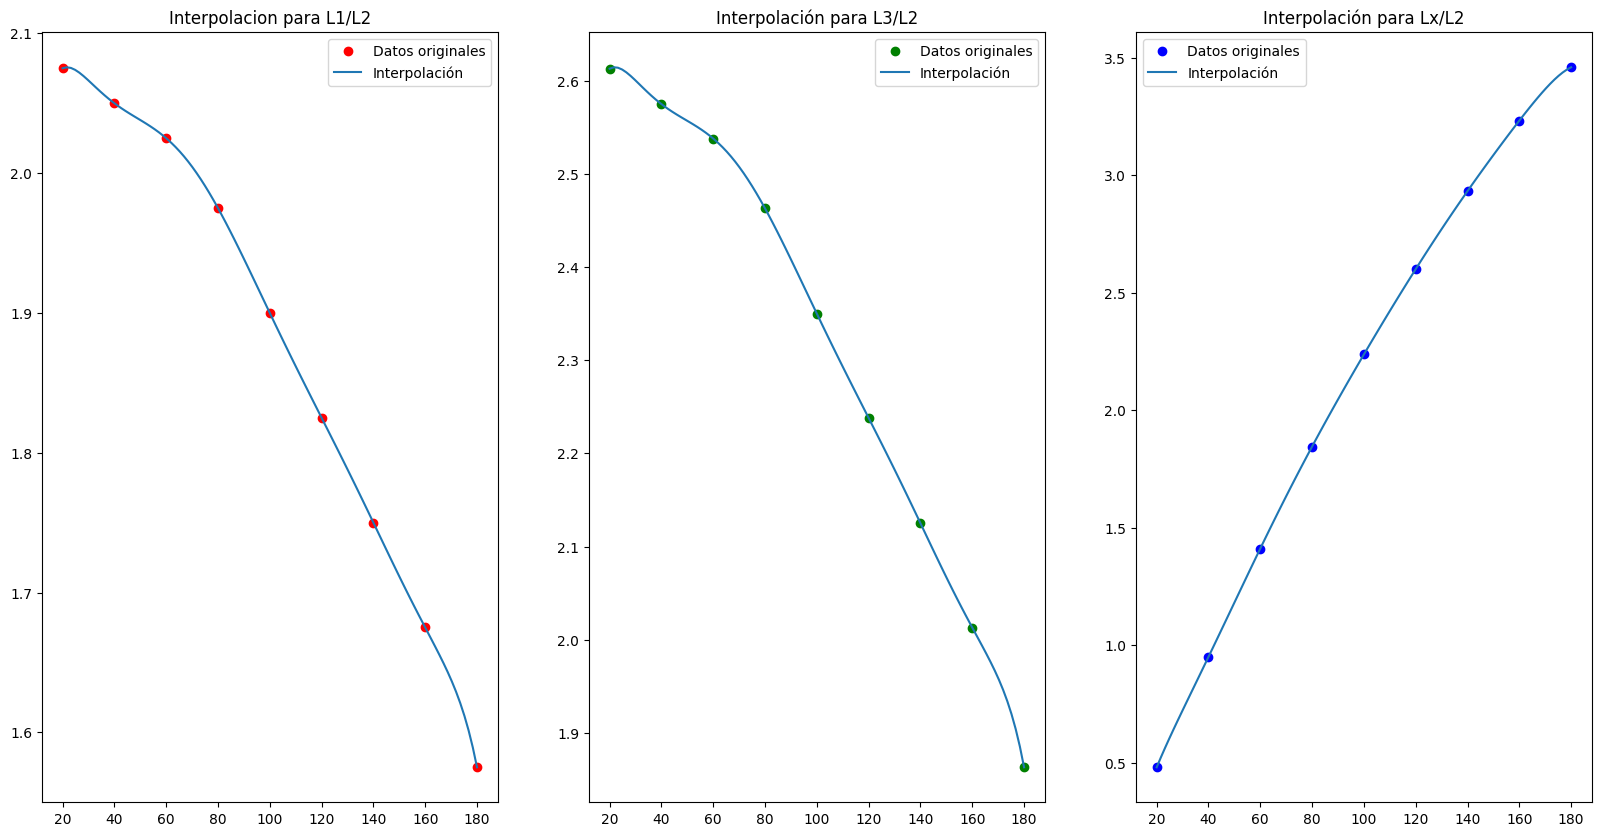

In [20]:
#Graficar
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].plot(angulo, L1_L2_v, 'ro', label='Datos originales')
axs[0].plot(X, y1_v, '-', label='Interpolación')
axs[0].set_title('Interpolacion para L1/L2')
axs[0].legend()

axs[1].plot(angulo, L3_L2_v, 'go', label='Datos originales')
axs[1].plot(X, y2_v, '-', label='Interpolación')
axs[1].set_title('Interpolación para L3/L2')
axs[1].legend()

axs[2].plot(angulo, Lx_L2_v, 'bo', label='Datos originales')
axs[2].plot(X, y3_v, '-', label='Interpolación')
axs[2].set_title('Interpolación para Lx/L2')
axs[2].legend()

In [21]:
#Calcular L1, L2, L3 y L4 para 30 grados, utilizando la mismo longitud del segemento (Lx) defininda anteriormente
L2_30_v = Lx/p3_v(30)
L3_30_v = L2_30_v*p2_v(30)
L1_30_v = L2_30_v*p1_v(30)
L4_30_v = L3_30_v

In [23]:
#Calcular L1, L2, L3 y L4 para 55 grados
L2_55_v = Lx/p3_v(55)
L3_55_v = L2_55_v*p2_v(55)
L1_55_v = L2_55_v*p1_v(55)
L4_55_v = L3_55_v

### Interpolación mediante Numpy

In [24]:
#Calcular la interpolación para los valores de la lista X
y1_numpy_v = np.interp(X, angulo, L1_L2_v)
y2_numpy_v = np.interp(X, angulo, L3_L2_v)
y3_numpy_v = np.interp(X, angulo, Lx_L2_v)

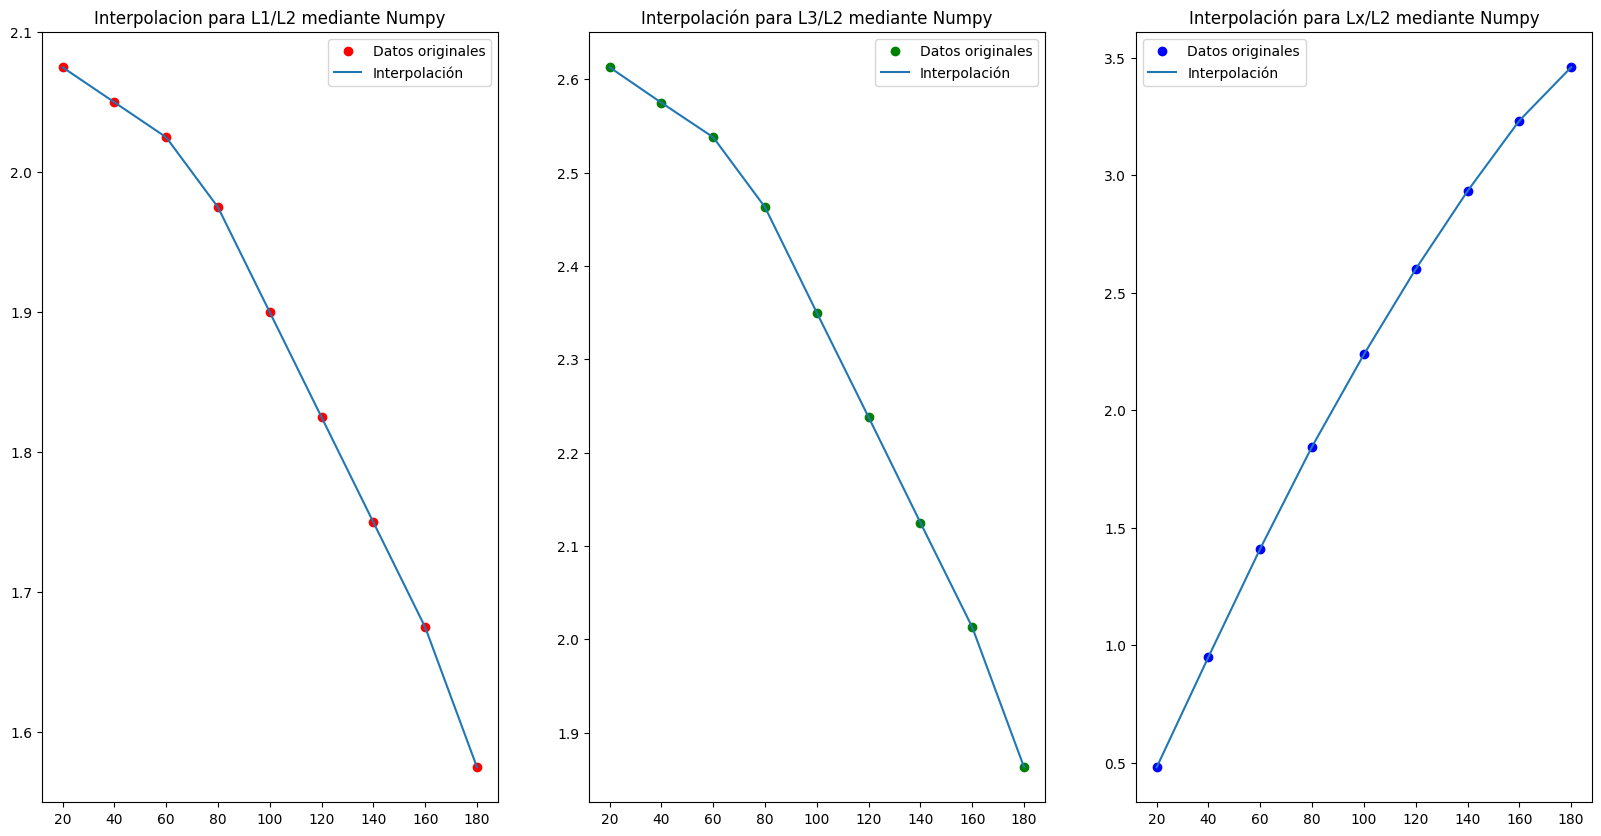

In [25]:
#Grafiacr los valores obtenidos y los valores dados
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].plot(angulo, L1_L2_v, 'ro', label='Datos originales')
axs[0].plot(X, y1_numpy_v, '-', label='Interpolación')
axs[0].set_title('Interpolacion para L1/L2 mediante Numpy')
axs[0].legend()

axs[1].plot(angulo, L3_L2_v, 'go', label='Datos originales')
axs[1].plot(X, y2_numpy_v, '-', label='Interpolación')
axs[1].set_title('Interpolación para L3/L2 mediante Numpy')
axs[1].legend()

axs[2].plot(angulo, Lx_L2_v, 'bo', label='Datos originales')
axs[2].plot(X, y3_numpy_v, '-', label='Interpolación')
axs[2].set_title('Interpolación para Lx/L2 mediante Numpy')
axs[2].legend()

In [26]:
#Calcular las longitudes L1, L2, L3 Y L4 para 30 grados
ang = 30
L2_30_numpy_v = Lx/np.interp(ang, angulo, Lx_L2_v)
L3_30_numpy_v = L2_30_numpy_v*np.interp(ang, angulo, L3_L2_v)
L1_30_numpy_v = L2_30_numpy_v*np.interp(ang, angulo, L1_L2_v)
L4_30_numpy_v = L3_30_numpy_v

In [27]:
#Calcular las longitudes L1, L2, L3 Y L4 para 55 grados
ang = 55
L2_55_numpy_v = Lx/np.interp(ang, angulo, Lx_L2_v)
L3_55_numpy_v = L2_55_numpy_v*np.interp(ang, angulo, L3_L2_v)
L1_55_numpy_v = L2_55_numpy_v*np.interp(ang, angulo, L1_L2_v)
L4_55_numpy_v = L3_55_numpy_v

In [28]:
#Mostrar los datos mediante un DataFrame de Pandas
df_velocidad = pd.DataFrame({
    'Ángulo (grados)':['30', '55'],
    'L1 (Lagrange)':[L1_30_v, L1_55_v],
    'L1 (Numpy)':[L1_30_numpy_v, L1_55_numpy_v],
    'L2 (Lagrange)':[L2_30_v, L2_55_v],
    'L2 (Numpy)':[L2_30_numpy_v, L2_55_numpy_v],
    'L3 (Lagrange)':[L3_30_v, L3_55_v],
    'L3 (Numpy)':[L3_30_numpy_v, L3_55_numpy_v],
    'L4 (Lagrange)':[L4_30_v, L4_55_v],
    'L4 (Numpy)':[L4_30_v, L4_55_v],
})

display(df_velocidad)

,Ángulo (grados),L1 (Lagrange),L1 (Numpy),L2 (Lagrange),L2 (Numpy),L3 (Lagrange),L3 (Numpy),L4 (Lagrange),L4 (Numpy)
0,30,57.222538,57.692308,27.693593,27.972028,72.013218,72.559441,72.013218,72.013218
1,55,31.349261,31.352499,15.426988,15.435076,39.314240,39.316998,39.314240,39.314240


## Conclusión
En este cuaderno de Python, se llevaron a cabo interpolaciones para calcular las longitudes L1, L2, L3 y L4, optimizándolas en términos de rectitud y velocidad. Se emplearon dos métodos distintos para estas interpolaciones: el método de Lagrange, proporcionado por SciPy, y el método interp de NumPy. Al examinar los DataFrames que contienen los resultados de las longitudes obtenidas por cada método, se constata que las diferencias entre ellos son mínimas. No obstante, un análisis más detallado de las gráficas generadas revela una mayor sensibilidad a las variaciones por parte del método de Lagrange de SciPy, evidenciado por gráficas que tienden a ser menos lineales en comparación con las generadas mediante el método interp de NumPy.